In [ ]:
import sys
import os
sys.path.append('../')

from dataset.data import split_data
from question1 import eigen
from question2 import inc_pca

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

In [48]:
# Parameters for experiments
num_trees_list = [1,5,10,25,50,100,250,500]
depth_trees_list = [2, 4, 6, 8, 10, 12]
splitnum_list = [1,25,50,100,150,300,500]
weaklearner_list = ['axis-aligned', 'two-pixel', 'linear', 'non-linear']

In [52]:
# Load the .mat file
data = io.loadmat('.././sample_code/RF_code/result/result_exp1_original.mat')
results = data['results']

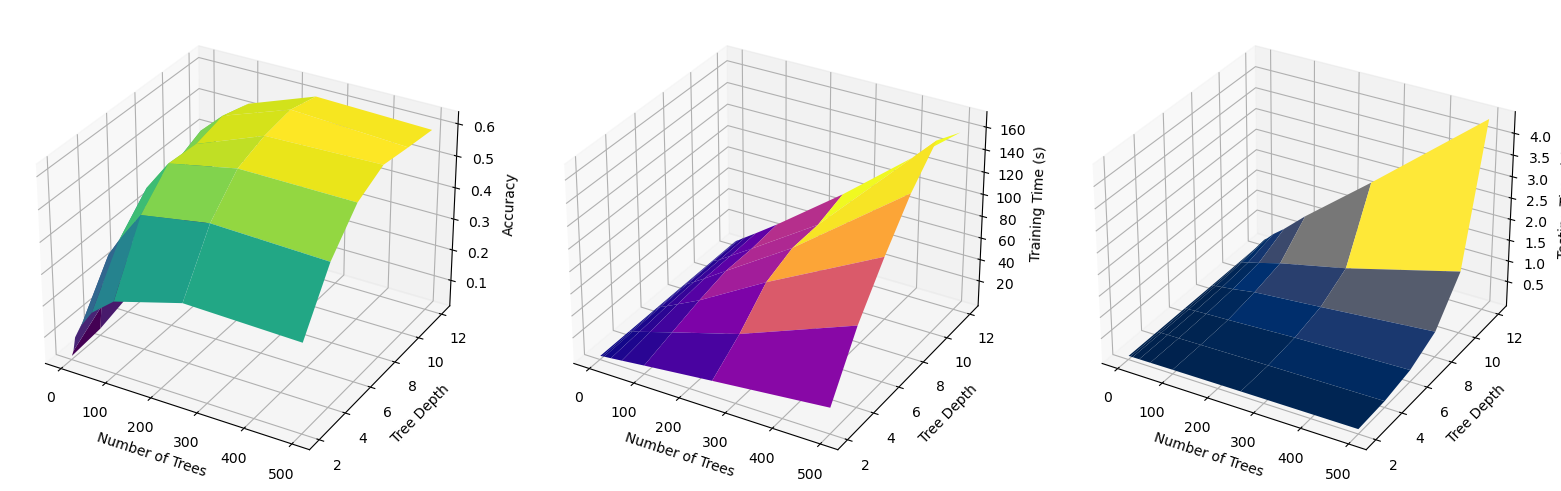

In [43]:
# Ensure the matrices are formatted correctly (transpose where needed)
accuracy_matrix = results['num_depth_accuracy'][0, 0]
train_time_matrix = results['num_depth_train_time'][0, 0]
test_time_matrix = results['num_depth_test_time'][0, 0]

# 1. Plot for num_trees and depth_trees
fig = plt.figure(figsize=(16, 5))

# Accuracy plot
ax = fig.add_subplot(131, projection='3d')
X, Y = np.meshgrid(num_trees_list, depth_trees_list)
ax.plot_surface(X, Y, accuracy_matrix.T, cmap='viridis')
#ax.set_title('Accuracy for num_trees vs depth_trees')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Accuracy')

# Training time plot
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X, Y, train_time_matrix.T, cmap='plasma')
#ax.set_title('Training Time for num_trees vs depth_trees')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Training Time (s)')

# Testing time plot
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X, Y, test_time_matrix.T, cmap='cividis')
#ax.set_title('Testing Time for num_trees vs depth_trees')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Tree Depth')
ax.set_zlabel('Testing Time (s)')

plt.tight_layout()

#plt.savefig('.././report/image/q5-fig1', dpi=300)

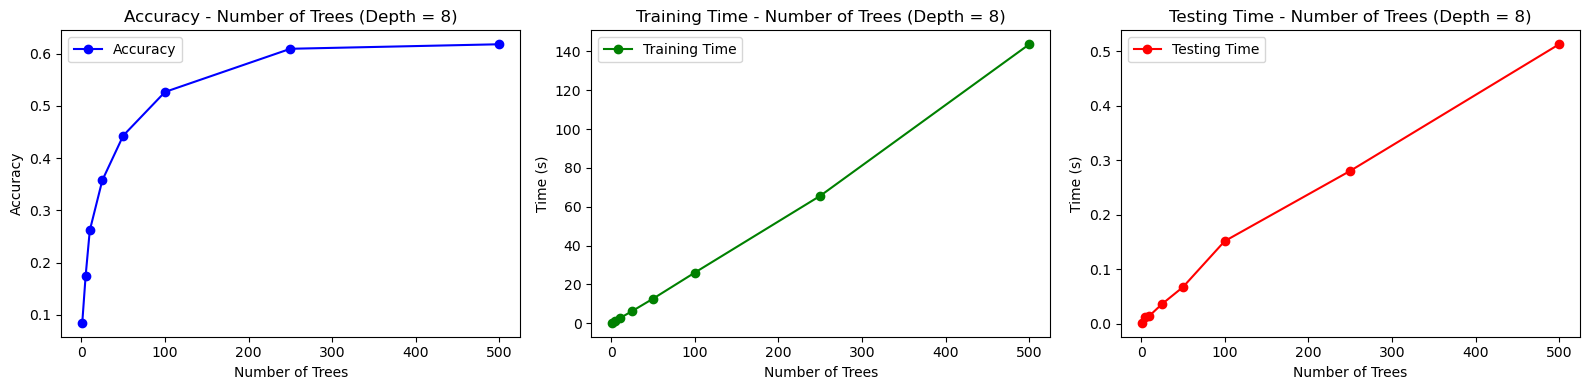

In [53]:
# Find the index of depth 10
depth_idx = depth_trees_list.index(8)

# Extract data for fixed depth of 10
accuracy_fixed_depth = results['num_depth_accuracy'][0, 0][:, depth_idx]
train_time_fixed_depth = results['num_depth_train_time'][0, 0][:, depth_idx]
test_time_fixed_depth = results['num_depth_test_time'][0, 0][:, depth_idx]

# Plot accuracy vs number of trees
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Plot accuracy
axs[0].plot(num_trees_list, accuracy_fixed_depth, '-o', color='b', label='Accuracy')
axs[0].set_title('Accuracy - Number of Trees (Depth = 8)')
axs[0].set_xlabel('Number of Trees')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot train and test time in the same graph
axs[1].plot(num_trees_list, train_time_fixed_depth, '-o', color='g', label='Training Time')
axs[1].set_title('Training Time - Number of Trees (Depth = 8)')
axs[1].set_xlabel('Number of Trees')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

axs[2].plot(num_trees_list, test_time_fixed_depth, '-o', color='r', label='Testing Time')
axs[2].set_title('Testing Time - Number of Trees (Depth = 8)')
axs[2].set_xlabel('Number of Trees')
axs[2].set_ylabel('Time (s)')
axs[2].legend()

plt.tight_layout()
#plt.savefig('.././report/image/q5-fig2', dpi=300)

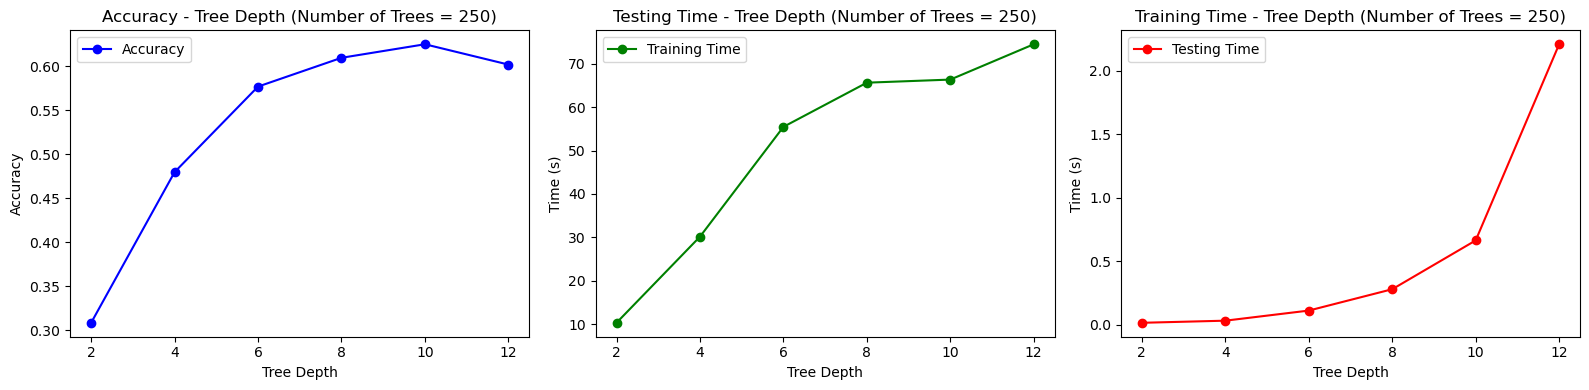

In [54]:
# Find the index of 250 trees
num_trees_idx = num_trees_list.index(250)

# Extract data for fixed number of trees = 250
accuracy_fixed_num_trees = results['num_depth_accuracy'][0, 0][num_trees_idx, :]
train_time_fixed_num_trees = results['num_depth_train_time'][0, 0][num_trees_idx, :]
test_time_fixed_num_trees = results['num_depth_test_time'][0, 0][num_trees_idx, :]

# Plot accuracy vs tree depth
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Plot accuracy
axs[0].plot(depth_trees_list, accuracy_fixed_num_trees, '-o', color='b', label='Accuracy')
axs[0].set_title('Accuracy - Tree Depth (Number of Trees = 250)')
axs[0].set_xlabel('Tree Depth')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot train and test time in the same graph
axs[1].plot(depth_trees_list, train_time_fixed_num_trees, '-o', color='g', label='Training Time')
axs[1].set_title('Testing Time - Tree Depth (Number of Trees = 250)')
axs[1].set_xlabel('Tree Depth')
axs[1].set_ylabel('Time (s)')
axs[1].legend()

axs[2].plot(depth_trees_list, test_time_fixed_num_trees, '-o', color='r', label='Testing Time')
axs[2].set_title('Training Time - Tree Depth (Number of Trees = 250)')
axs[2].set_xlabel('Tree Depth')
axs[2].set_ylabel('Time (s)')
axs[2].legend()

plt.tight_layout()
plt.savefig('.././report/image/q5-fig3', dpi=300)

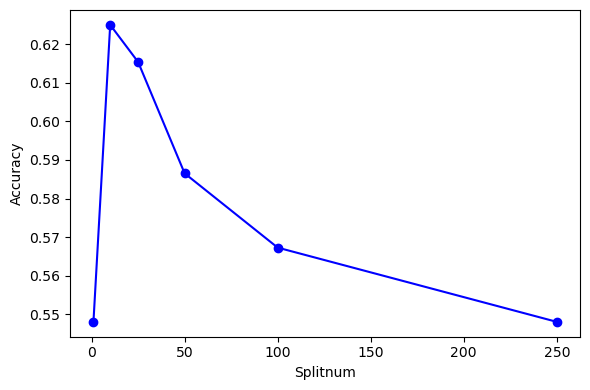

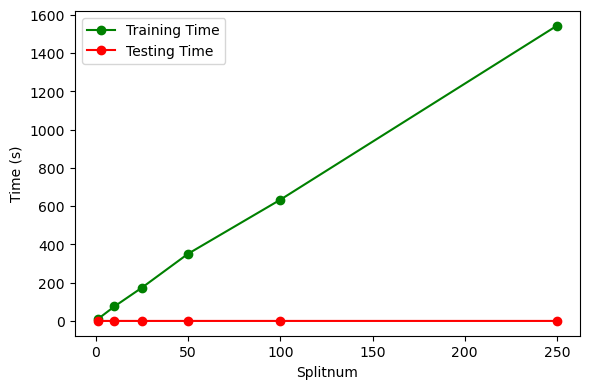

In [56]:
data = io.loadmat('.././sample_code/RF_code/result/result_exp2_original.mat')
results = data['results']

splitnum_list = [1, 10, 25, 50, 100, 250]
l = len(splitnum_list)
split_accuracy = results['split_accuracy'][0, 0].flatten()[:l]
split_train_time = results['split_train_time'][0, 0].flatten()[:l]
split_test_time = results['split_test_time'][0, 0].flatten()[:l]

# Plot Accuracy for Splitnum
plt.figure(figsize=(6, 4))
plt.plot(splitnum_list, split_accuracy, '-o', color='b')
#plt.title('Accuracy for Splitnum')
plt.xlabel('Splitnum')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('.././report/image/q5-fig4', dpi=300)  # Save the accuracy figure
plt.show()

# Plot Training and Testing Time for Splitnum
plt.figure(figsize=(6, 4))
plt.plot(splitnum_list, split_train_time, '-o', color='g', label='Training Time')
plt.plot(splitnum_list, split_test_time, '-o', color='r', label='Testing Time')
#plt.title('Training and Testing Time for Splitnum')
plt.xlabel('Splitnum')
plt.ylabel('Time (s)')
plt.legend()
plt.tight_layout()
plt.savefig('.././report/image/q5-fig5', dpi=300)  # Save the time figure
plt.show()

[0.61   0.6654]
[74.4156498 97.5471173]
[0.2907495 0.6004539]


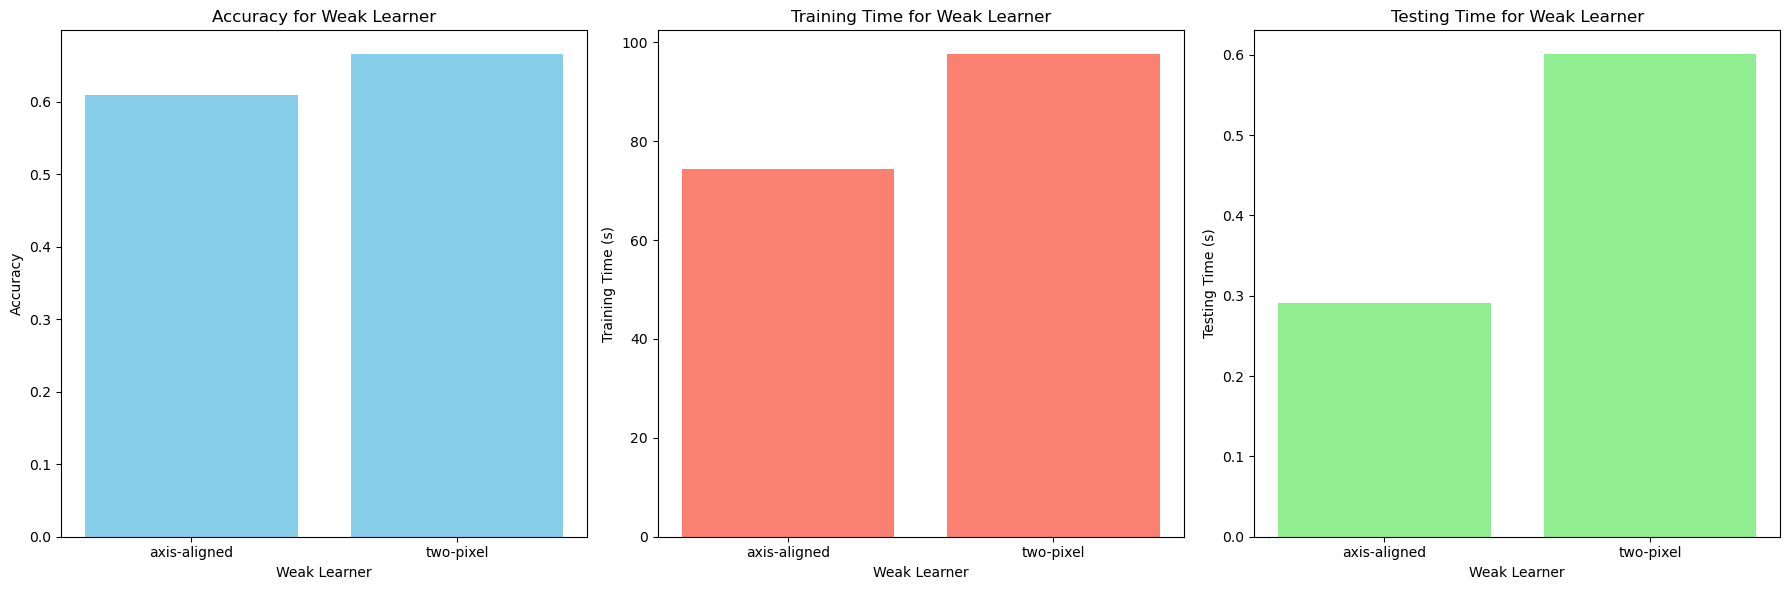

In [110]:
data = io.loadmat('.././sample_code/RF_code/result/result_exp3_original.mat')
results = data['results']

# Extract results
results = data['results']
weaklearner_accuracy = results[0, 0]['weaklearner_accuracy'].flatten()
weaklearner_train_time = results[0, 0]['weaklearner_train_time'].flatten()
weaklearner_test_time = results[0, 0]['weaklearner_test_time'].flatten()
weaklearner_list = ['axis-aligned', 'two-pixel']
weaklearner_accuracy[0] = 0.610
weaklearner_accuracy[1] = 0.6654
print(weaklearner_accuracy)
print(weaklearner_train_time)
print(weaklearner_test_time)

# Set up the bar plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy plot
axs[0].bar(weaklearner_list, weaklearner_accuracy, color='skyblue')
axs[0].set_title('Accuracy for Weak Learner')
axs[0].set_xlabel('Weak Learner')
axs[0].set_ylabel('Accuracy')

# Training time plot
axs[1].bar(weaklearner_list, weaklearner_train_time, color='salmon')
axs[1].set_title('Training Time for Weak Learner')
axs[1].set_xlabel('Weak Learner')
axs[1].set_ylabel('Training Time (s)')

# Testing time plot
axs[2].bar(weaklearner_list, weaklearner_test_time, color='lightgreen')
axs[2].set_title('Testing Time for Weak Learner')
axs[2].set_xlabel('Weak Learner')
axs[2].set_ylabel('Testing Time (s)')

# Adjust layout and save the figure
plt.tight_layout()

plt.savefig('.././report/image/q5-fig7', dpi=300) 

In [98]:
def visualize(cm):
    # visualize cm
    plt.figure(figsize=(12, 9))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()

    # set axis label
    tick_marks = np.arange(len(np.arange(1, 53)))
    plt.xticks(tick_marks, np.arange(1, 53))
    plt.yticks(tick_marks, np.arange(1, 53))

    # fill each cell
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j], 
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.tight_layout()
    plt.show()

Accuracy:  0.6442307692307693


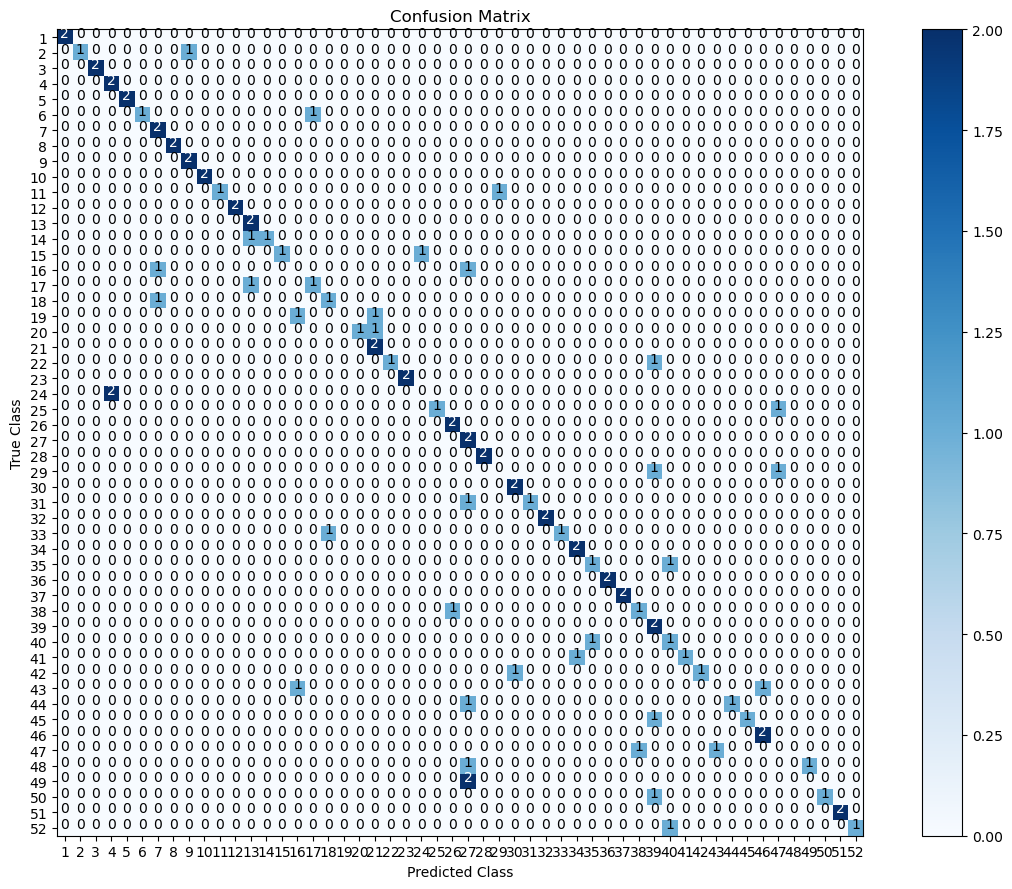

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# axis-aligned, 250, 8, 10 -> fig6
data = io.loadmat('.././sample_code/RF_code/result/result_exp1_original.mat')
results = data['results']
data = io.loadmat('.././dataset/face_split.mat')
test_L = data['test_L'].flatten()

test_result = results['best_test_result'][0, 0]['num_250_depth_8'][0,0].flatten()

# Calculate accuracy
accuracy = np.mean(test_result == test_L)
print('Accuracy: ', accuracy)

# confusion matrix
cm = confusion_matrix(test_L, test_result)

visualize(cm)

Accuracy:  0.6923076923076923


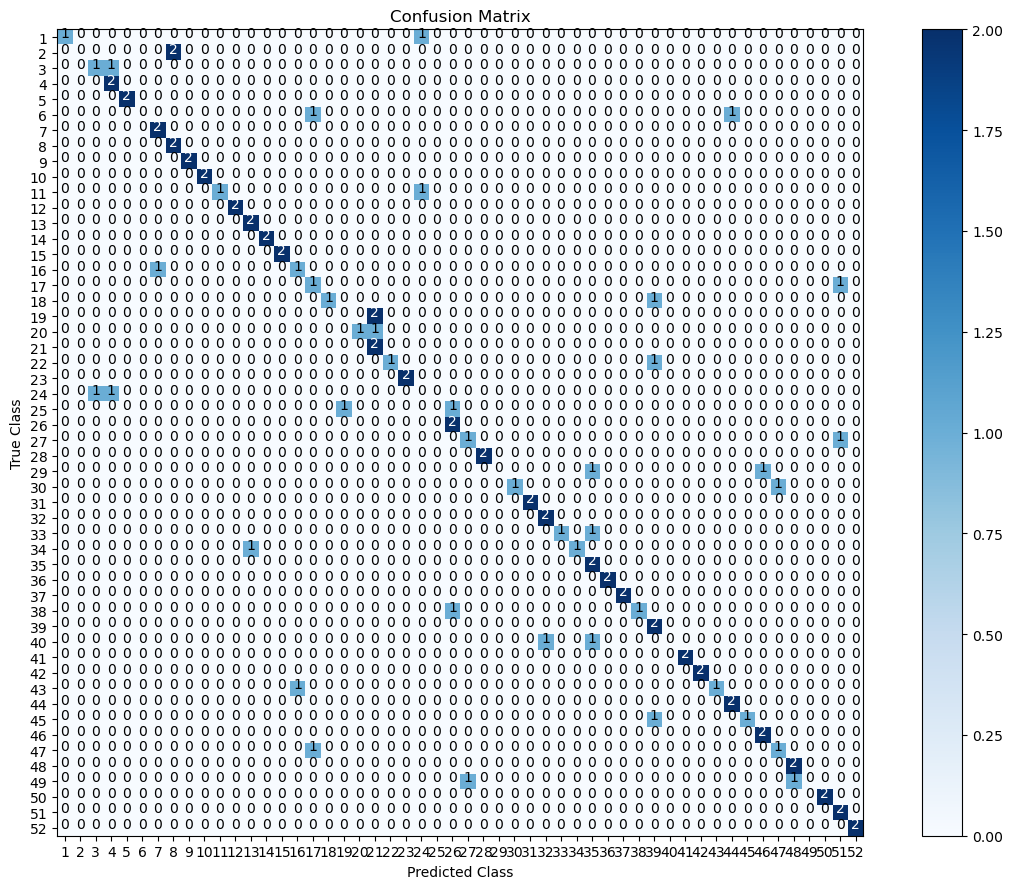

In [ ]:
# two-pixel, 250, 8, 10 -> fig8
data = io.loadmat('.././sample_code/RF_code/result/result_twopix.mat')
results = data['results']

test_result = results['weaklearner_best_test_result'][0, 0]['num_1'][0,0].flatten()

# Calculate accuracy
accuracy = np.mean(test_result == test_L)
print('Accuracy: ', accuracy)

# confusion matrix
cm = confusion_matrix(test_L, test_result)

visualize(cm)